In [13]:
import matplotlib.pyplot as plt
import numpy as np
import json

# Configure matplotlib for better looking plots
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline


In [80]:
def plot_ideological_bar(letters, positions, bar_spec, bar_label='Voter Preference', 
                         left_color='lightgray', right_color='darkgray', second_bar_spec=None, 
                         figsize=(8, 3), dpi=300):
    """
    Plot a horizontal bar with two colored sections and labeled positions.
    Optionally displays a second bar below with three sections (blue, purple, red).
    
    Parameters:
    -----------
    letters : list of str
        Letters to display on the bar (e.g., ['A', 'B'])
    positions : list of float
        Positions where letters should be placed (0-100 scale)
    bar_spec : float
        The position (0-100) where left_color transitions to right_color
    bar_label : str, default='Voter Preference in a...'
        Label to display above the bar, centered over it
    left_color : str, default='blue'
        Color for the left section (0 to bar_spec)
    right_color : str, default='red'
        Color for the right section (bar_spec to 100)
    second_bar_spec : tuple of (float, float), optional
        If provided, draws a second bar below with three sections.
        Tuple specifies (blue-purple division, purple-red division)
    figsize : tuple, default=(8, 3)
        Figure size in inches (width, height)
    dpi : int, default=300
        Resolution in dots per inch
    """
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    
    dividing_line = bar_spec
    
    # Draw bar left section (0 to dividing_line)
    ax.barh(0, dividing_line, height=40, left=0, color=left_color, 
            align='center', edgecolor='none')
    
    # Draw bar right section (dividing_line to 100)
    ax.barh(0, 100 - dividing_line, height=40, left=dividing_line, color=right_color, 
            align='center', edgecolor='none')
    
    # Draw second bar if specified
    if second_bar_spec is not None:
        bar2_height = 20
        bar2_y_offset = -20
        div1, div2 = second_bar_spec
        # Blue section (0 to div1)
        ax.barh(bar2_y_offset, div1, height=bar2_height, left=0, color='blue', 
                align='center', edgecolor='none')
        # Purple section (div1 to div2)
        ax.barh(bar2_y_offset, div2 - div1, height=bar2_height, left=div1, color='purple', 
                align='center', edgecolor='none')
        # Red section (div2 to 100)
        ax.barh(bar2_y_offset, 100 - div2, height=bar2_height, left=div2, color='red', 
                align='center', edgecolor='none')
        
        # Add labels within the second bar
        ax.text(div1/2, bar2_y_offset, 'Democrats', color='white', fontsize=12,
                ha='center', va='center', zorder=10)
        ax.text((div1 + div2)/2, bar2_y_offset, 'Independents', color='white', fontsize=12,
                ha='center', va='center', zorder=10)
        ax.text((div2 + 100)/2, bar2_y_offset, 'Republicans', color='white', fontsize=12,
                ha='center', va='center', zorder=10)
    
    # Add letters at specified positions
    for letter, position in zip(letters, positions):
        ax.text(position, 0, letter, color='white', fontsize=20, fontweight='bold',
                ha='center', va='center', zorder=10)
    
    # Add bar label centered over the bar (bar spans 0-100, so center is at 50)
    ax.text(50, 30, bar_label, color='black', fontsize=12,
            ha='center', va='center', zorder=10)
    
    # Set x axis from 0 to 100 in steps of 10
    ax.set_xlim(0, 100)
    ax.set_xticks(range(0, 101, 10))
    ax.set_xlabel('Voters', fontsize=14)
    
    # Add whitespace above and below
    ax.set_ylim(-100, 100)
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.tight_layout()
    plt.show()


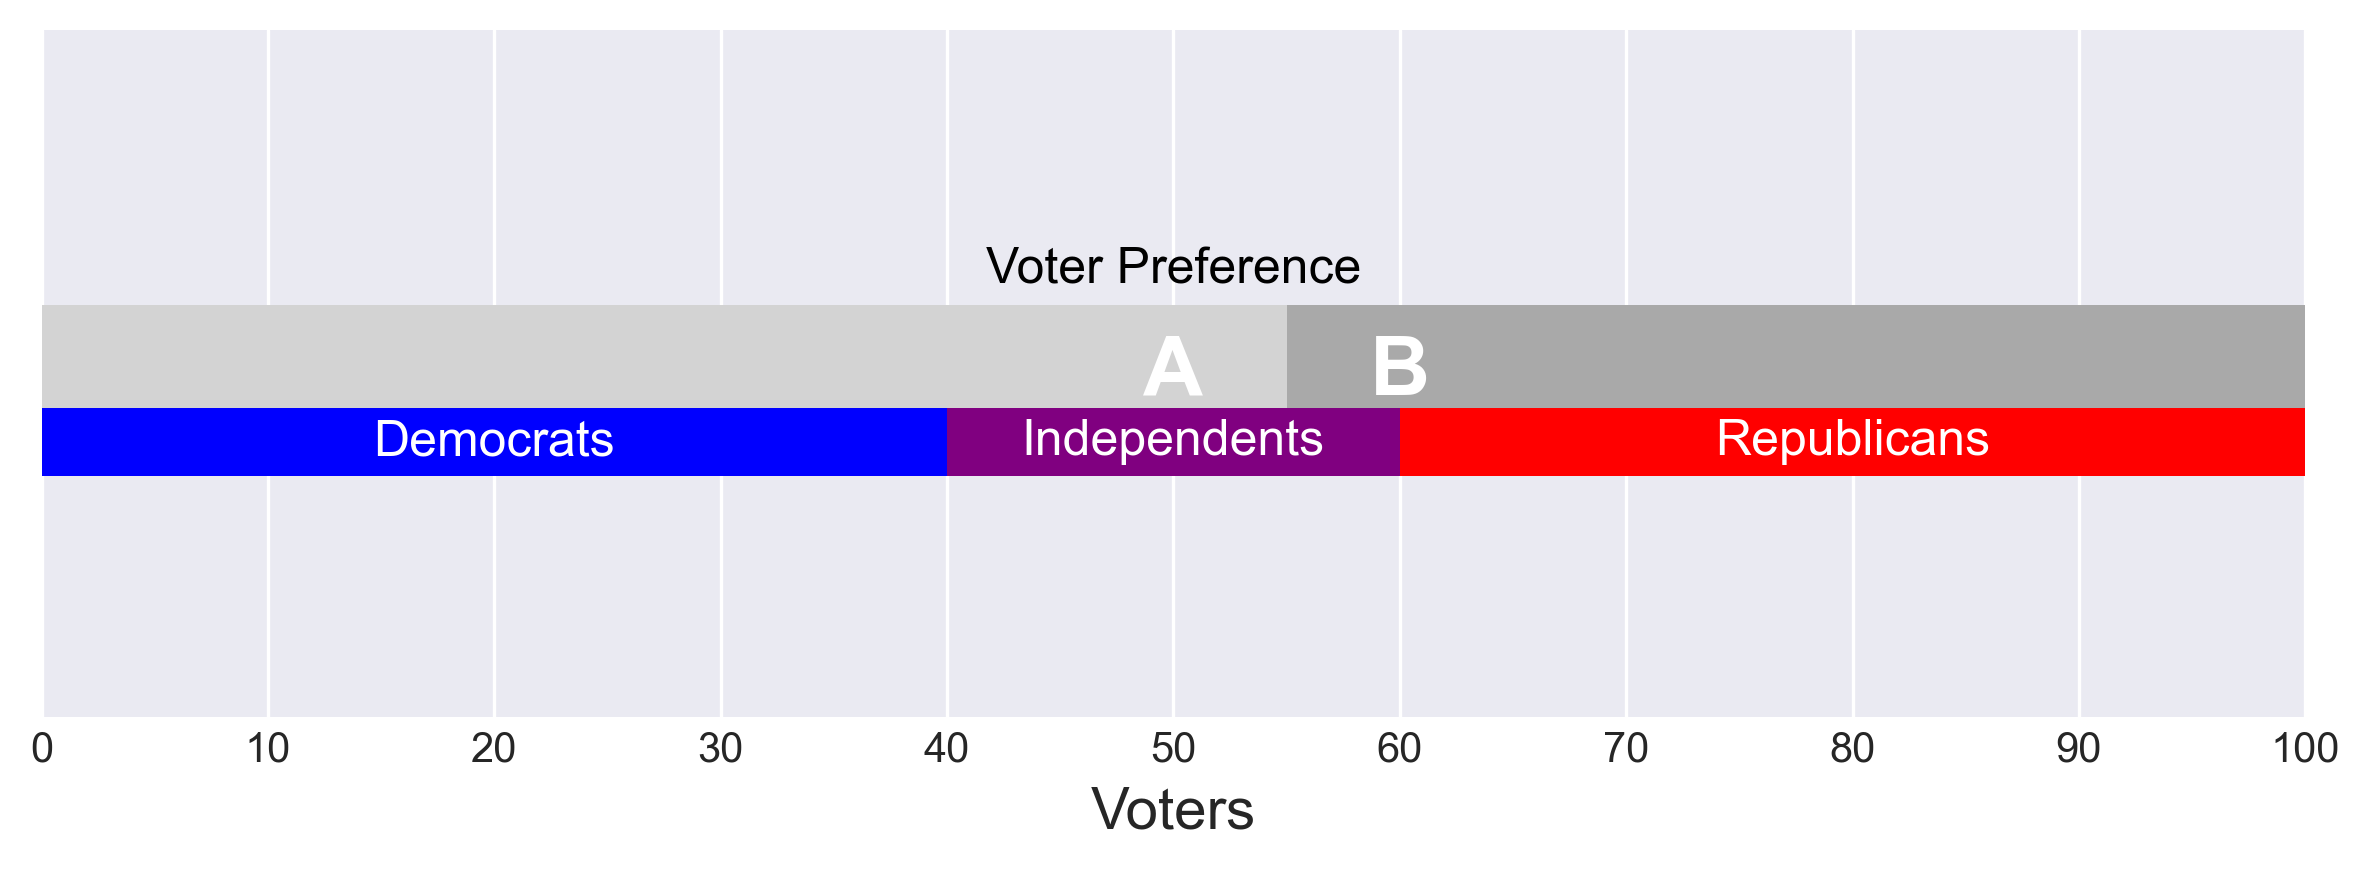

In [81]:
# Example usage: Bar from 0-100 with divider at 55, with second bar showing voter distribution
plot_ideological_bar(letters=['A', 'B'], positions=[50, 60], bar_spec=55, second_bar_spec=(40, 60))


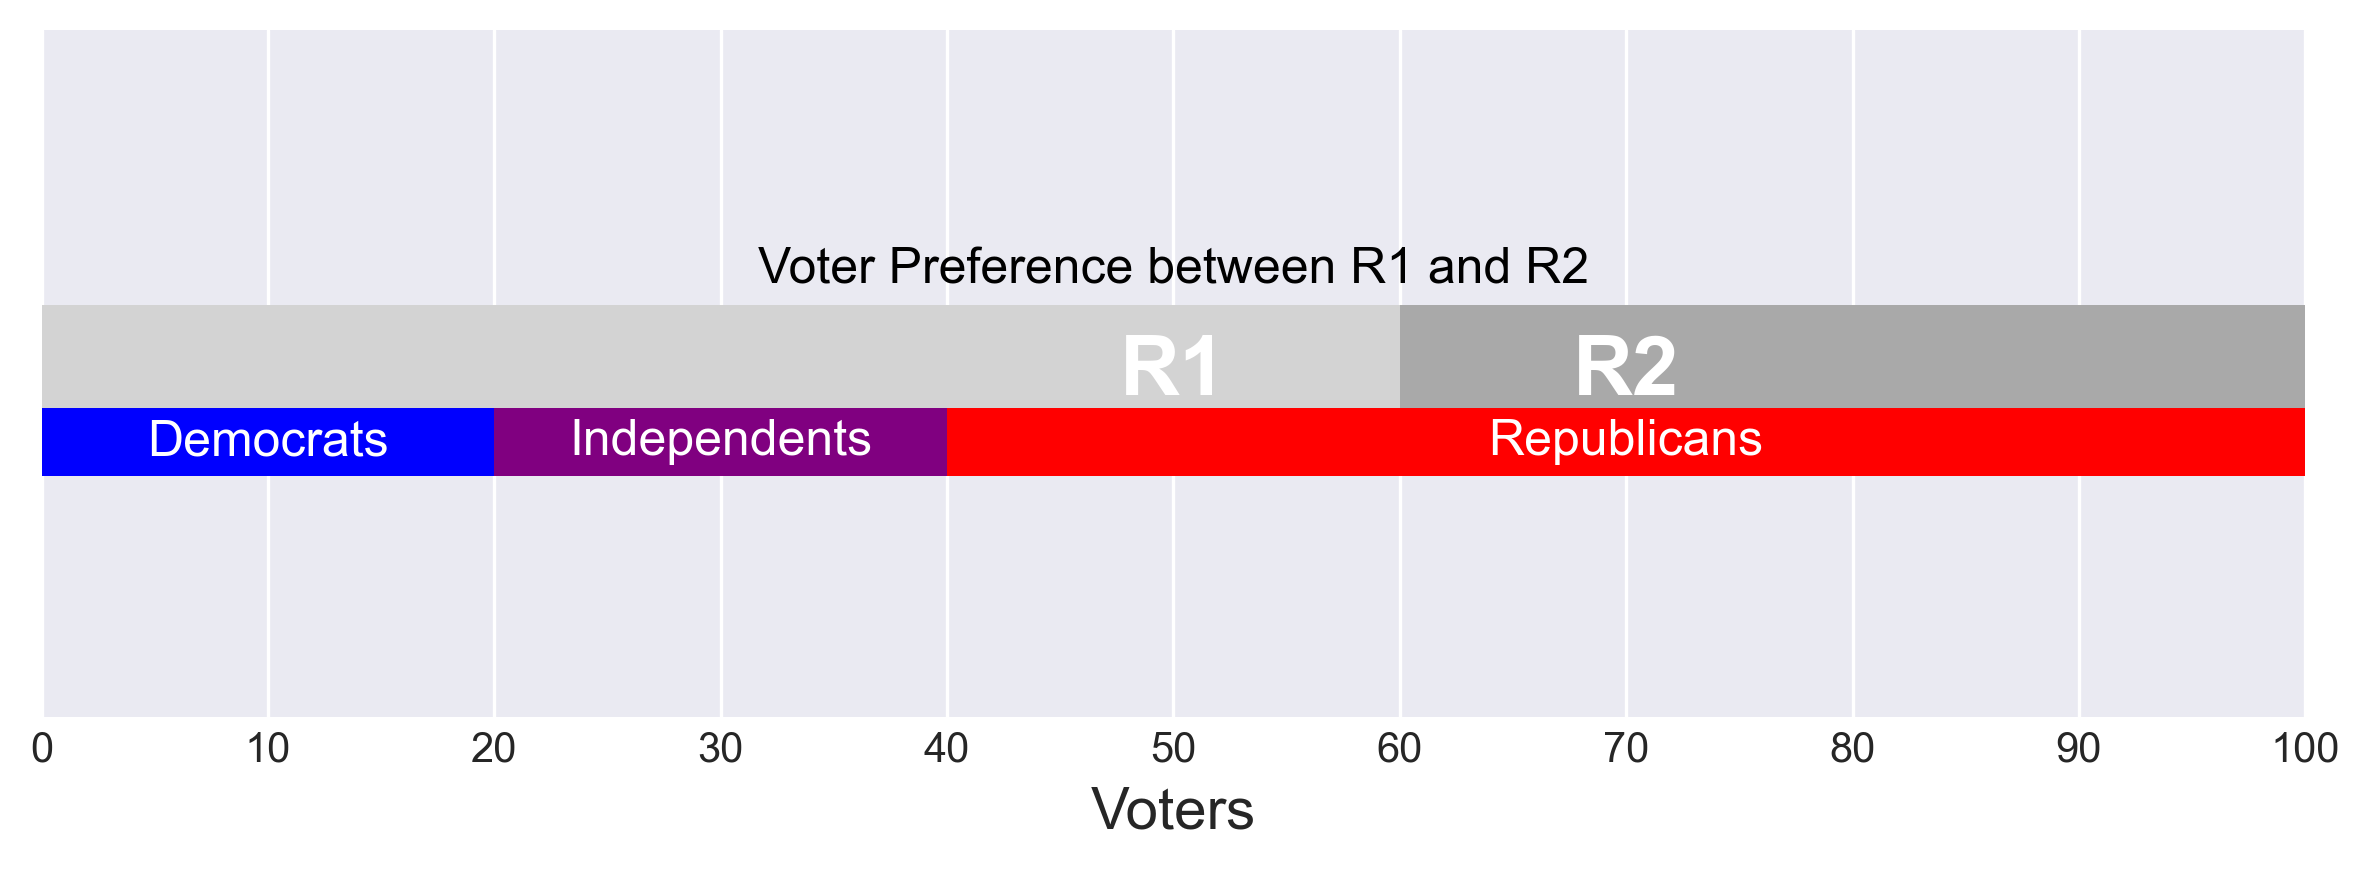

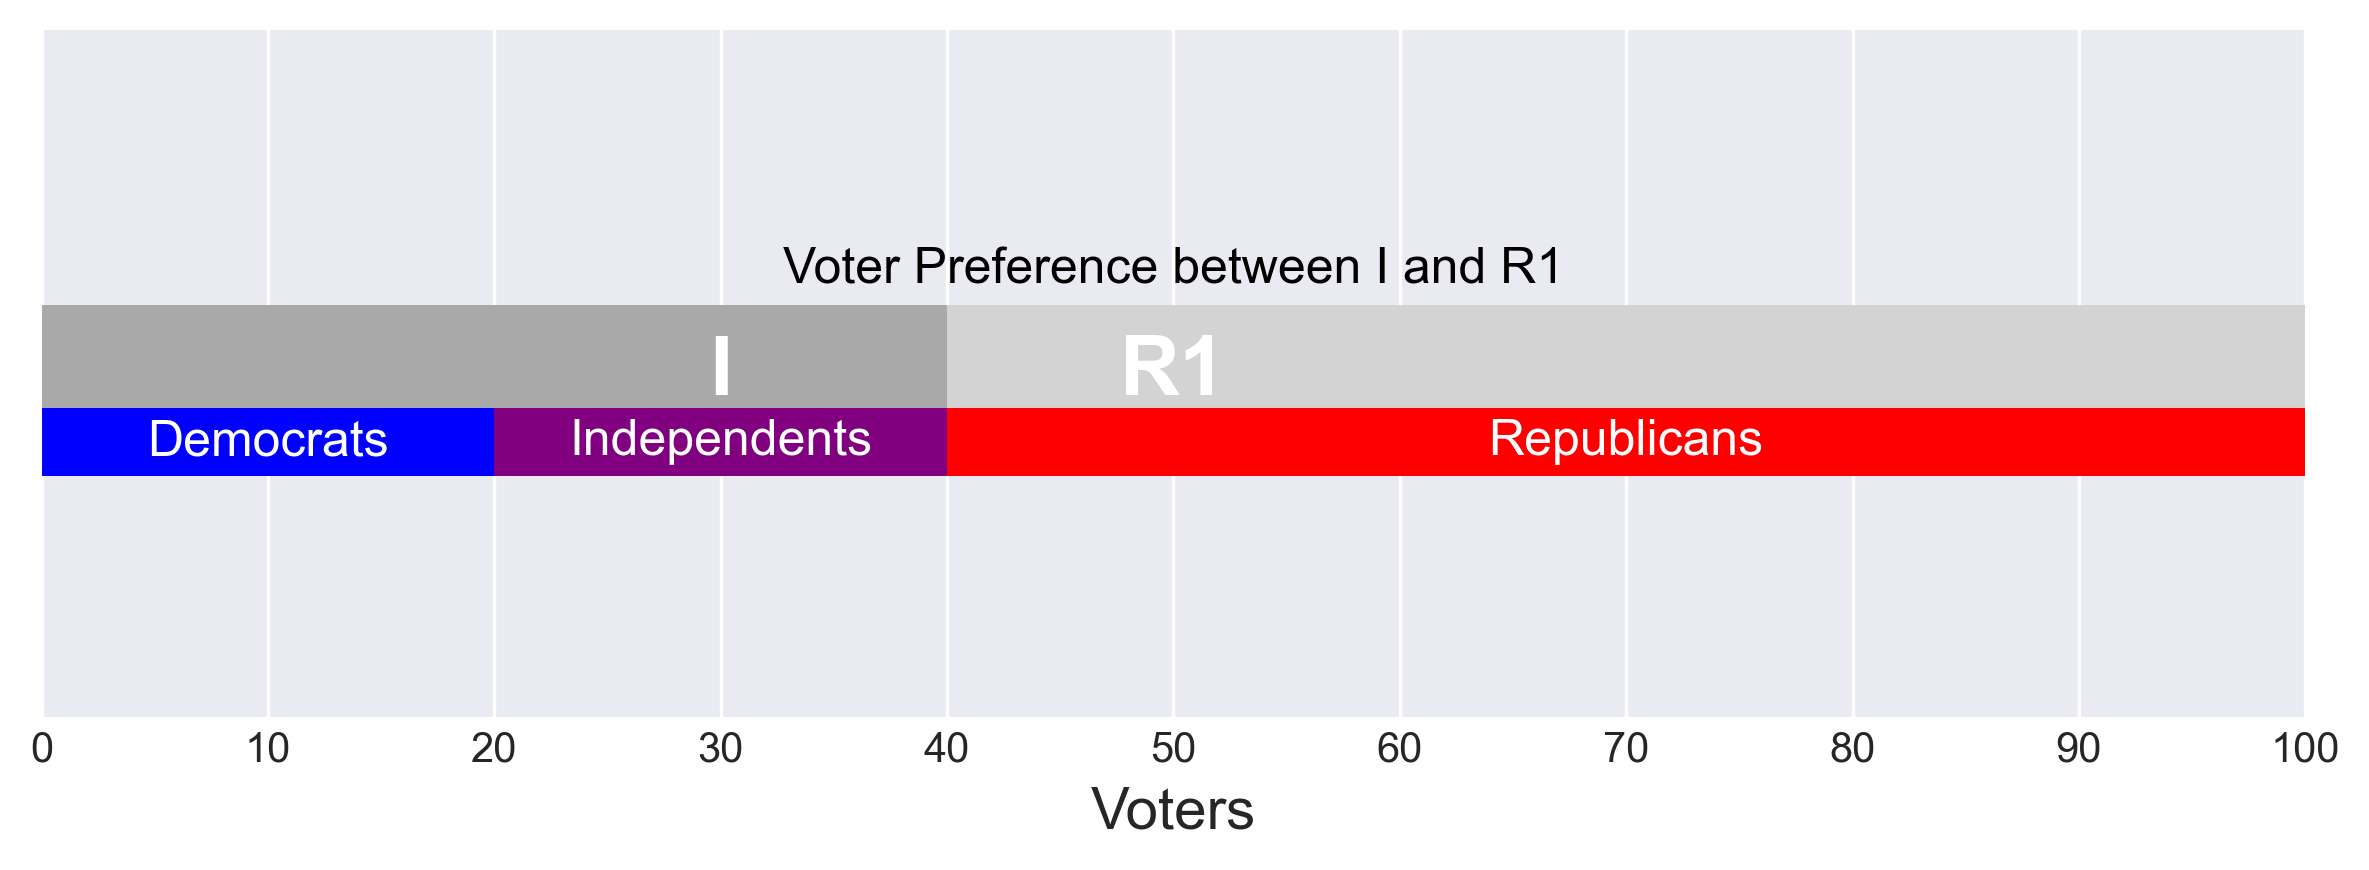

In [87]:
# Example with custom parameters: Bar from 0-100 with divider at 65
plot_ideological_bar(
    letters=['R1', 'R2'], 
    positions=[50, 70],
    bar_spec=60,
    bar_label='Voter Preference between R1 and R2',
    left_color='lightgray',
    right_color='darkgray',
    second_bar_spec=(20, 40)
)

plot_ideological_bar(
    letters=['I', 'R1'], 
    positions=[30, 50],
    bar_label='Voter Preference between I and R1',
    bar_spec=40,
    left_color='darkgray',
    right_color='lightgray',
    second_bar_spec=(20, 40)
)


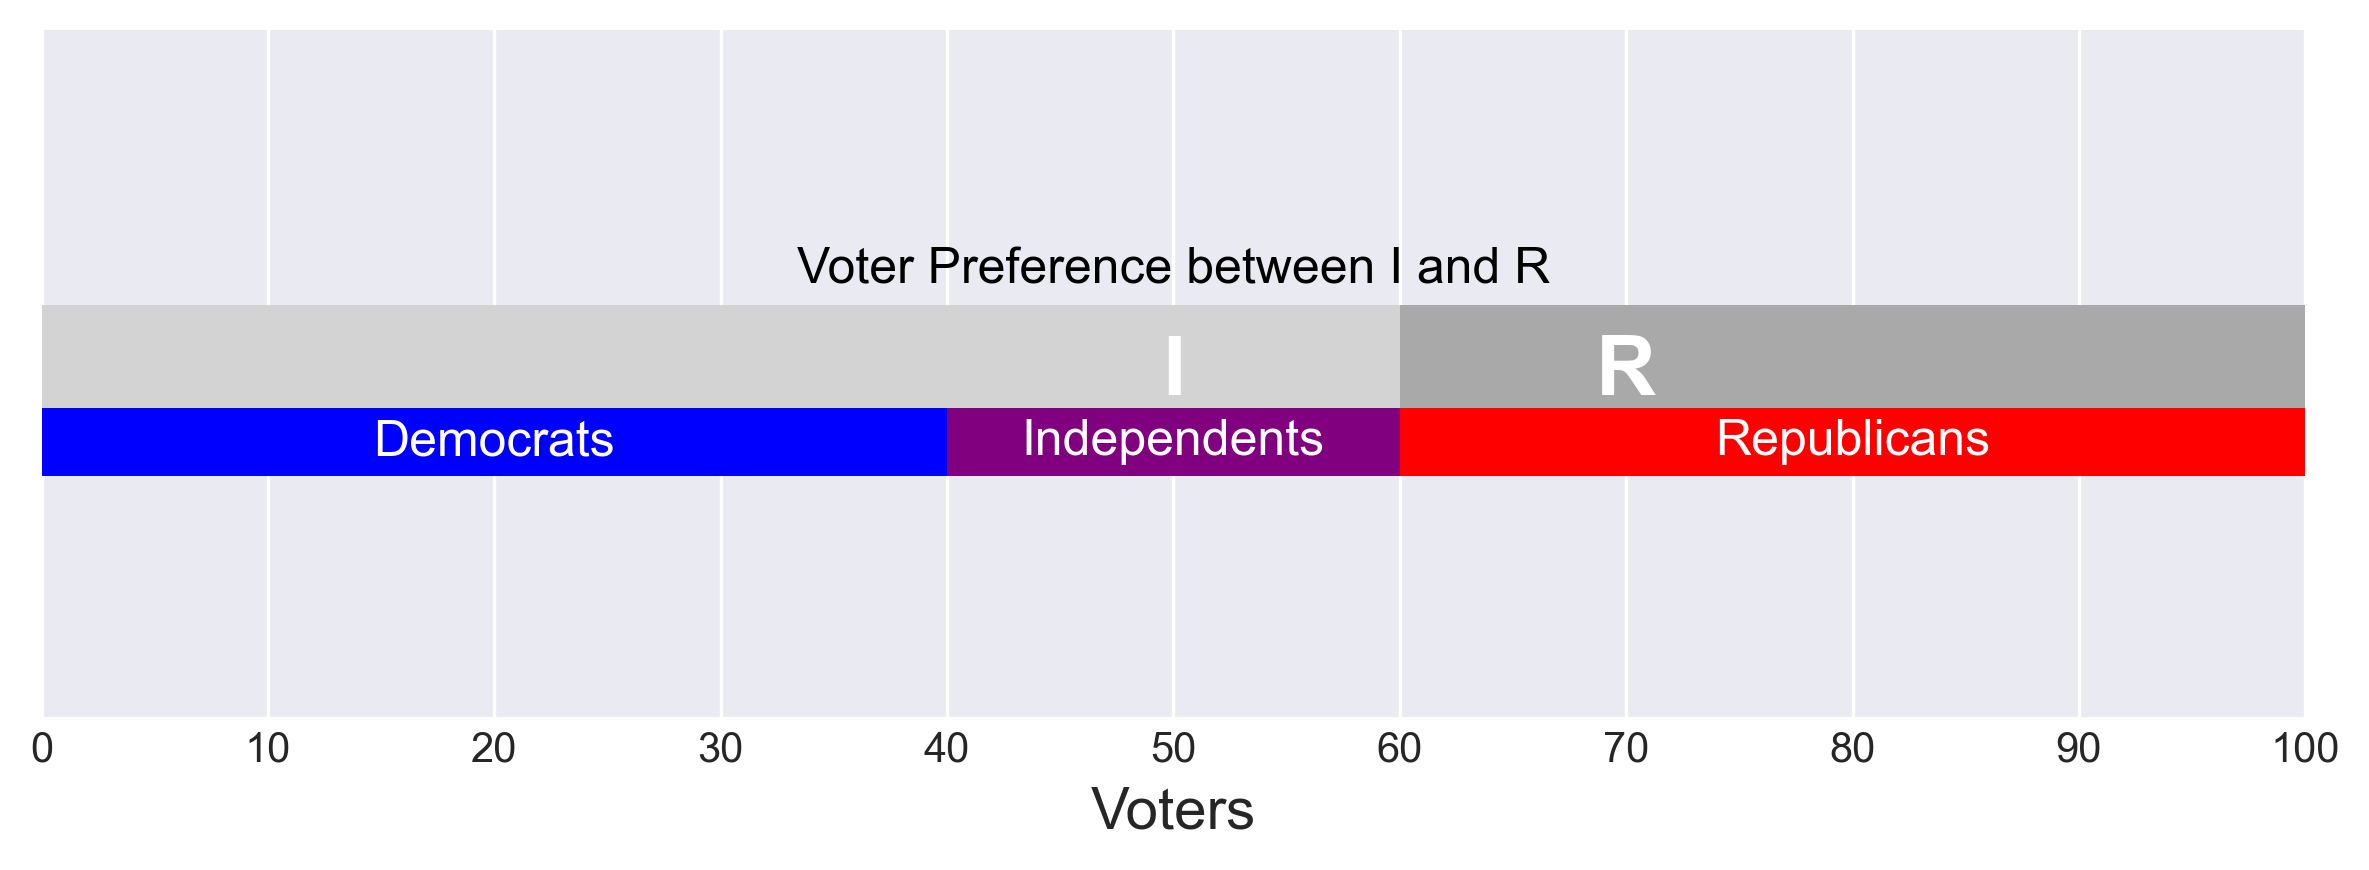

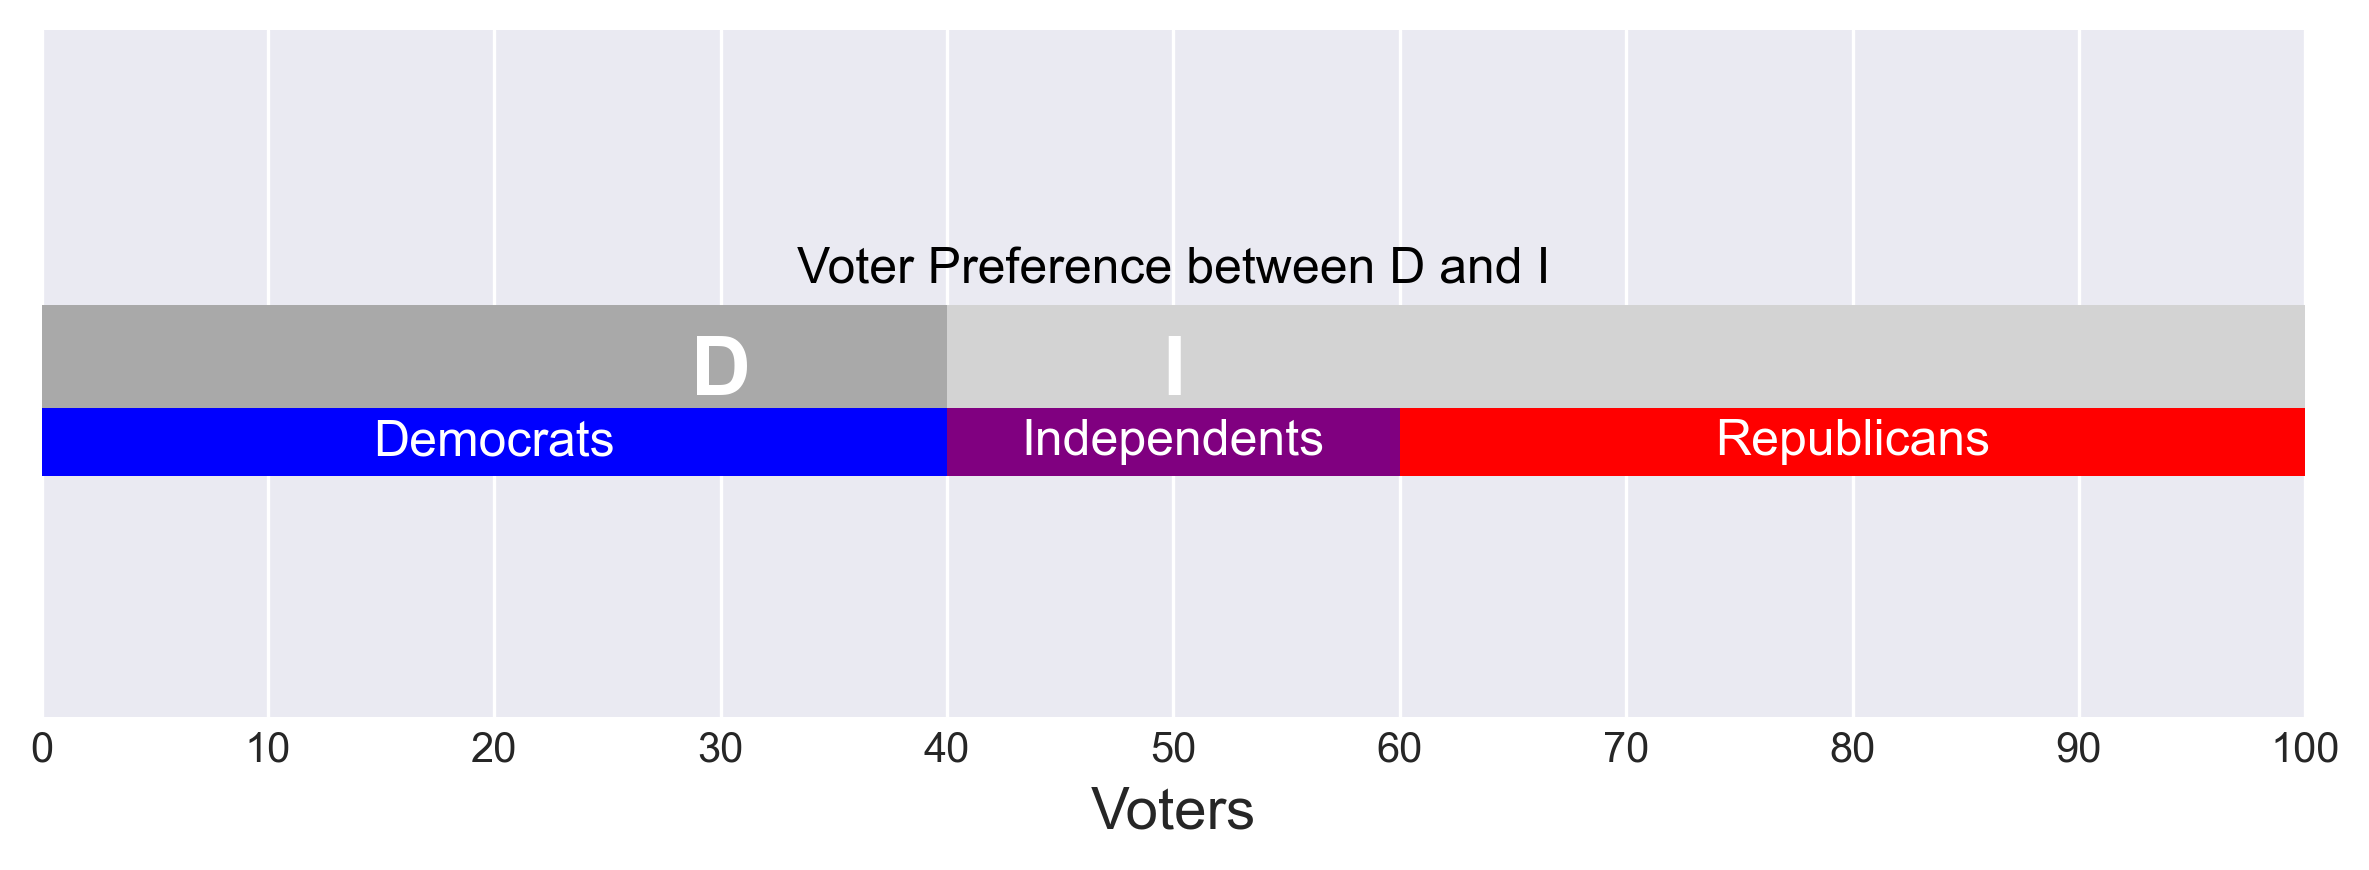

In [88]:
# Example with custom parameters: Bar from 0-100 with divider at 65
plot_ideological_bar(
    letters=['I', 'R'], 
    positions=[50, 70],
    bar_spec=60,
    bar_label='Voter Preference between I and R',
    left_color='lightgray',
    right_color='darkgray',
    second_bar_spec=(40, 60)
)

plot_ideological_bar(
    letters=['D', 'I'], 
    positions=[30, 50],
    bar_label='Voter Preference between D and I',
    bar_spec=40,
    left_color='darkgray',
    right_color='lightgray',
    second_bar_spec=(40, 60)
)


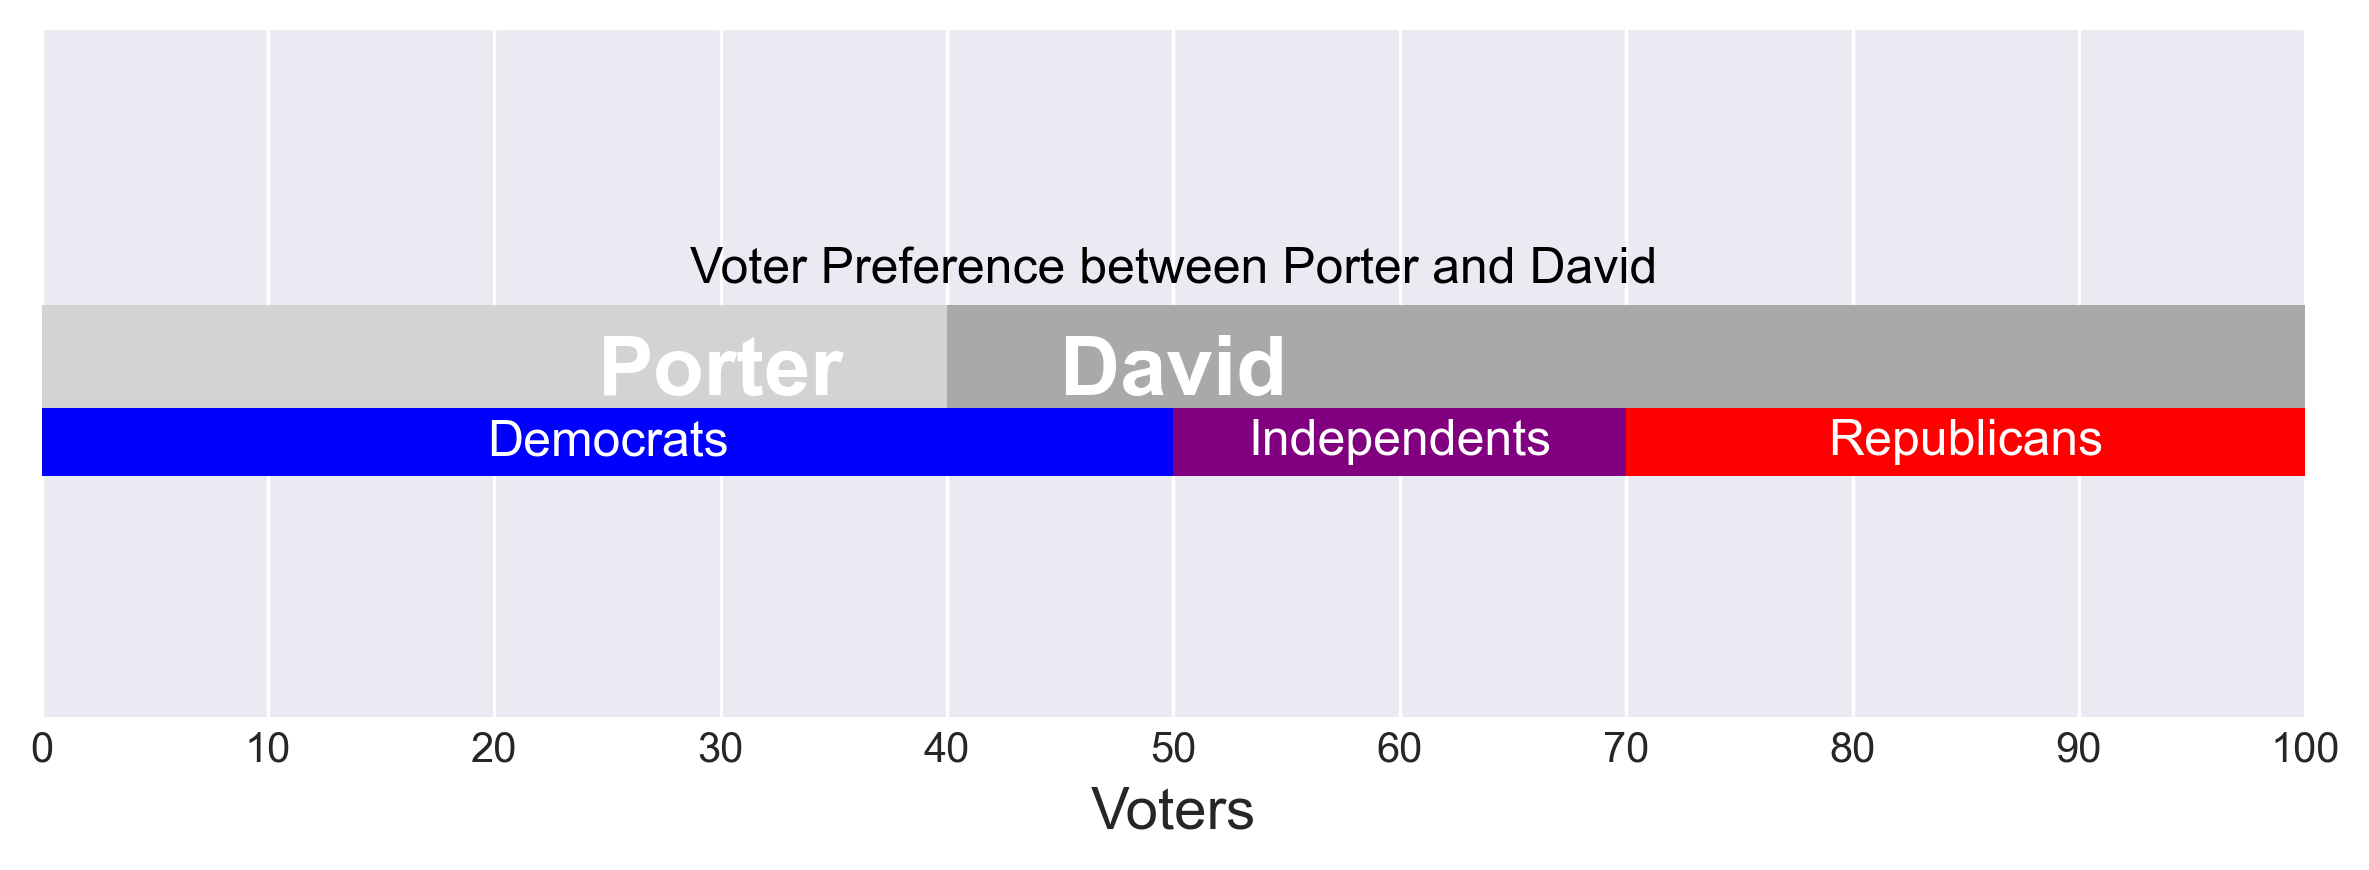

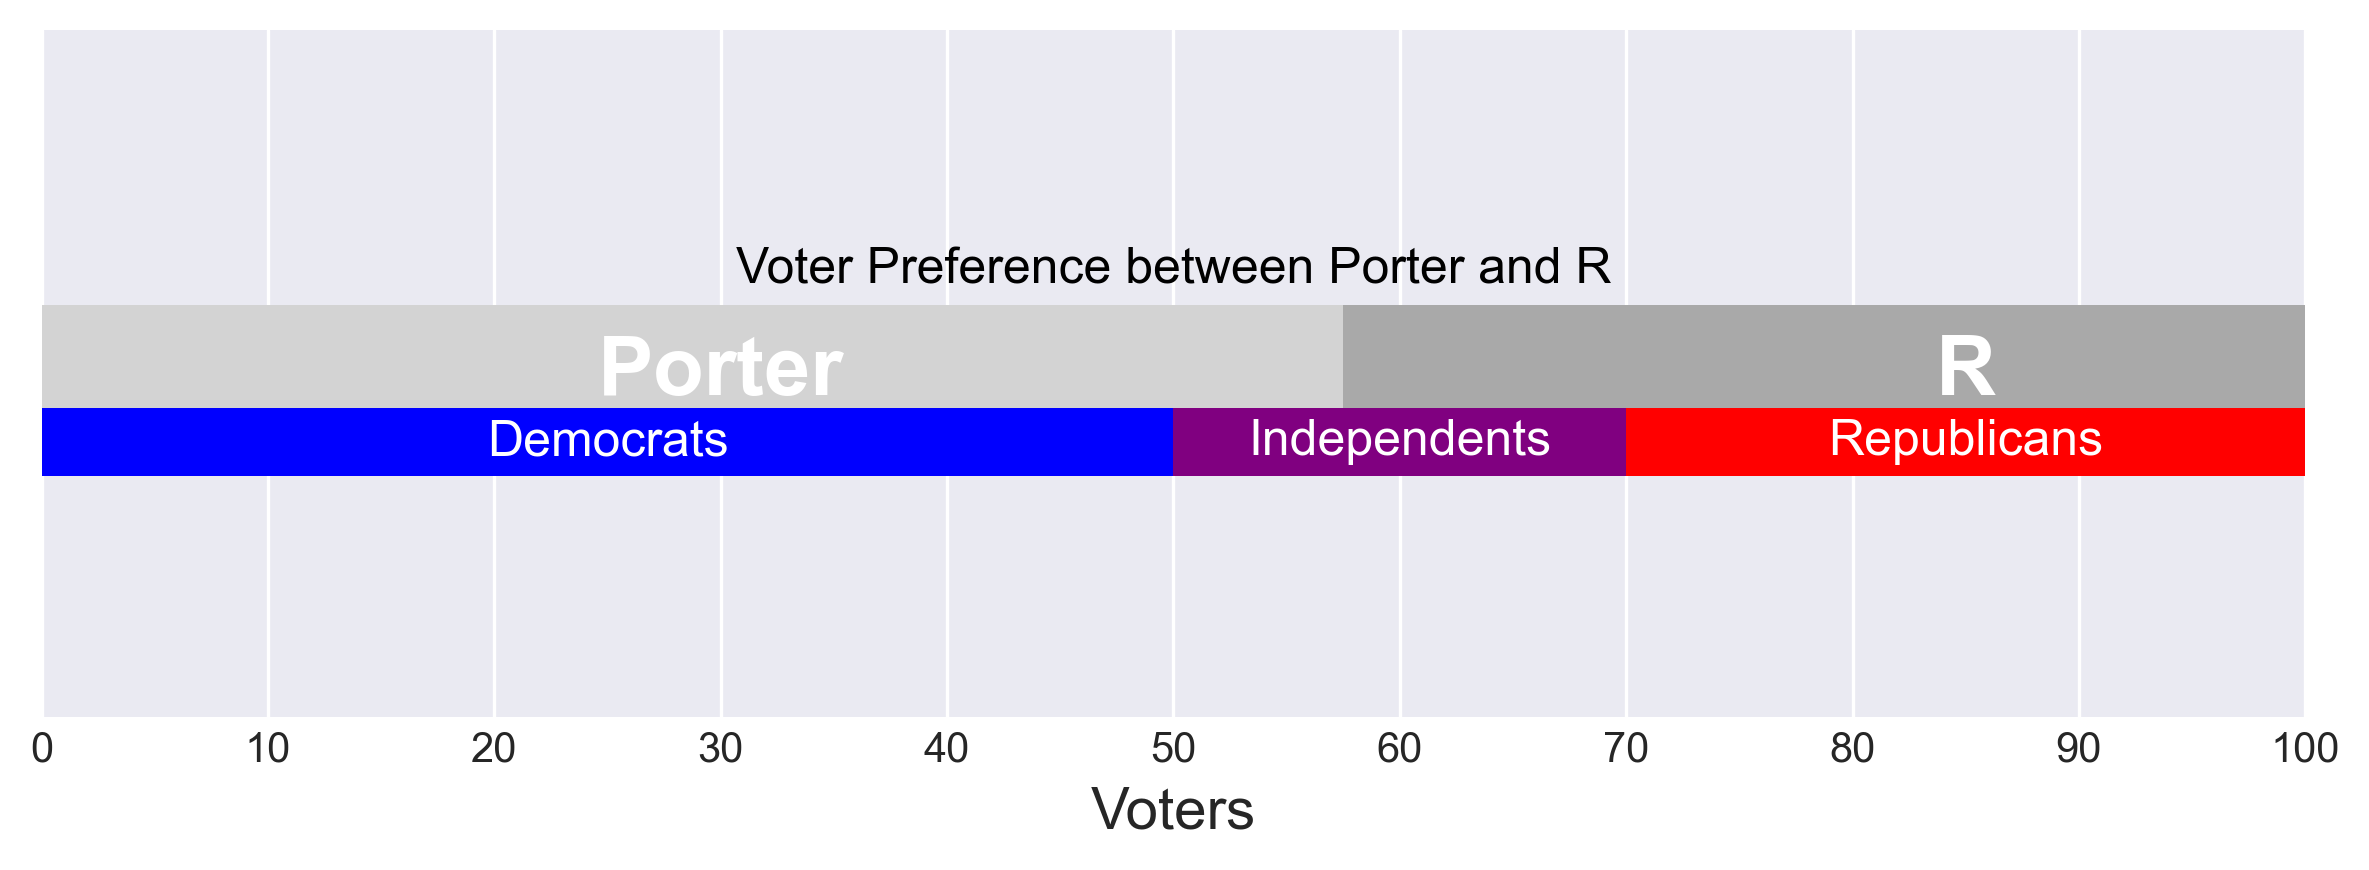

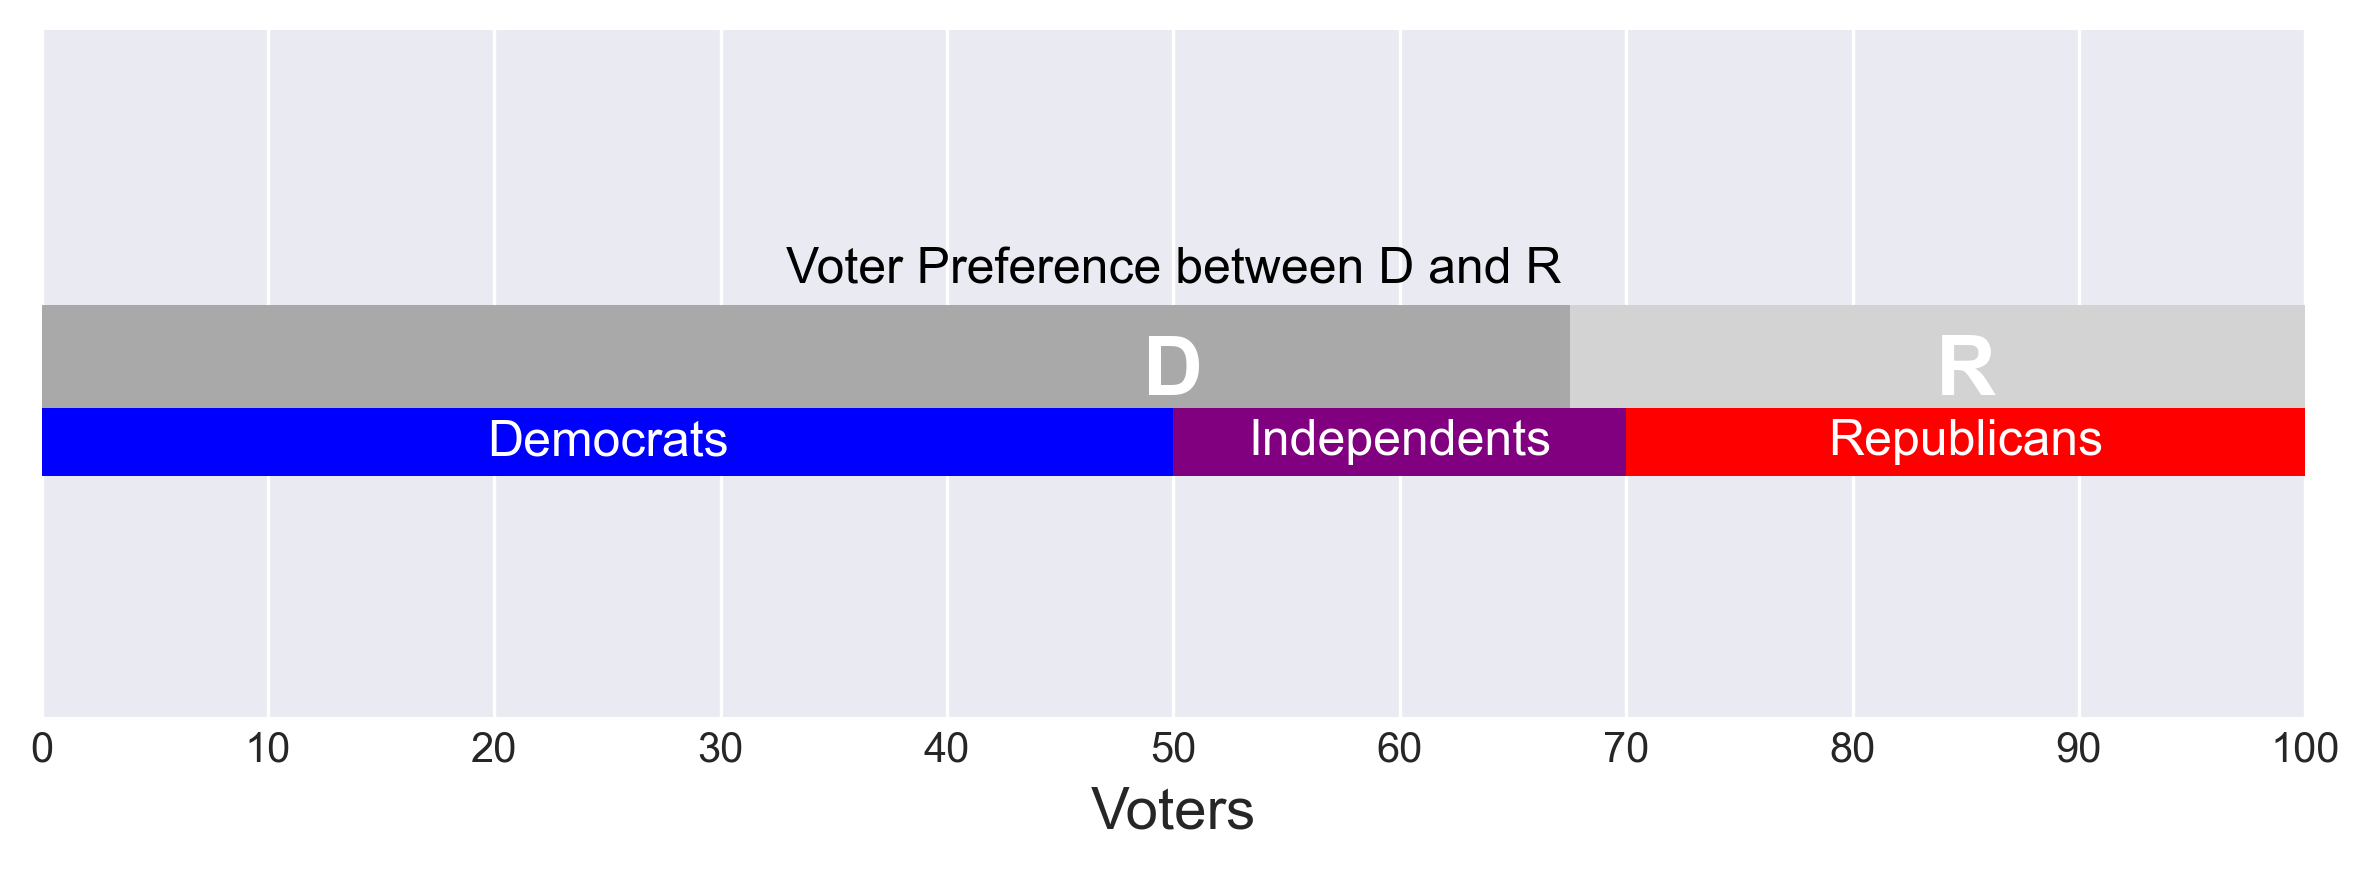

In [94]:
# Example with custom parameters: Bar from 0-100 with divider at 65
plot_ideological_bar(
    letters=['Porter', 'David'], 
    positions=[30, 50],
    bar_spec=40,
    bar_label='Voter Preference between Porter and David',
    left_color='lightgray',
    right_color='darkgray',
    second_bar_spec=(50, 70),
)

plot_ideological_bar(
    letters=['Porter', 'R'], 
    positions=[30, 85],
    bar_spec=57.5,
    bar_label='Voter Preference between Porter and R',
    left_color='lightgray',
    right_color='darkgray',
    second_bar_spec=(50, 70),
)

plot_ideological_bar(
    letters=['D', 'R'], 
    positions=[50, 85],
    bar_label='Voter Preference between D and R',
    bar_spec=67.5,
    left_color='darkgray',
    right_color='lightgray',
    second_bar_spec=(50, 70),
)

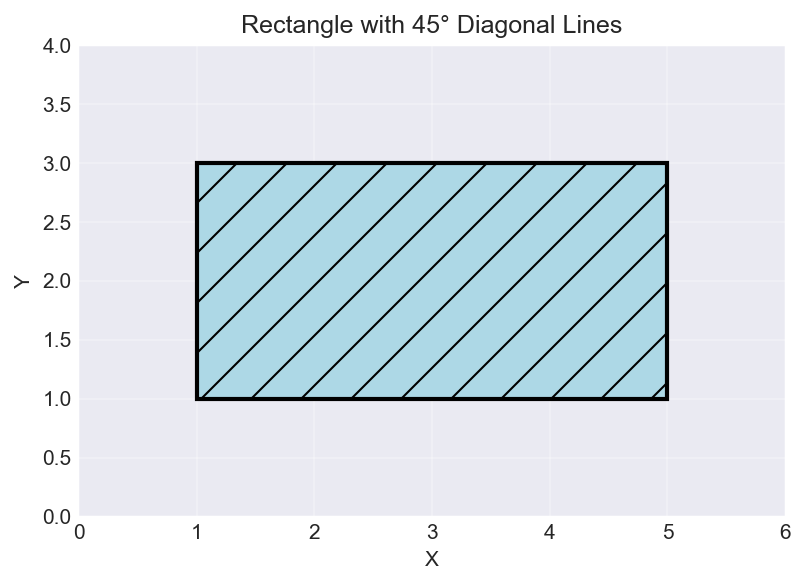

In [100]:
# Draw a rectangle with diagonal line pattern at 45 degrees
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)

# Create a rectangle with hatch pattern
# The '///' pattern creates diagonal lines leaning right at 45 degrees
rect = plt.Rectangle((1, 1), 4, 2, 
                      facecolor='lightblue',
                      edgecolor='black',
                      hatch='/',
                      linewidth=2)
ax.add_patch(rect)

# Set the axis limits
ax.set_xlim(0, 6)
ax.set_ylim(0, 4)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Rectangle with 45° Diagonal Lines')

plt.tight_layout()
plt.show()
